In [65]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [66]:
musicData = pd.read_csv(r"C:\Users\ASUS\PycharmProjects\Chat_bot\utils\csv\music.csv")
musicData

,Language,MusicCategory,Source
0,Hindi,Classical Music(Old),https://www.youtube.com/watch?v=Dv0CoJlrmww
1,Hindi,Classical Music(New),https://www.youtube.com/watch?v=sR72qlhpwEo
2,Hindi,Romantic Music (Old ),https://www.youtube.com/watch?v=5HvPhqmzGQ8
3,Hindi,Romantic Music (New),https://www.youtube.com/watch?v=yIlAe2EQOLY
4,Hindi,Road Trip Music (Old),https://www.youtube.com/watch?v=da2havkA7x0
...,...,...,...
175,English,Road Trip Music (New),https://www.youtube.com/watch?v=MnmcEjEzlLk
176,English,Dance Music (Old),https://www.youtube.com/watch?v=fSqicTTg1Ps
177,English,Dance Music (New),https://www.youtube.com/watch?v=KNaCJYX-mgY
178,English,Sad Music (Old),https://www.youtube.com/watch?v=31uL5UnYrVg


In [67]:
musicData.describe(include='all')

,Language,MusicCategory,Source
count,180,180,180
unique,18,12,180
top,Hindi,Classical Music(New),https://www.youtube.com/watch?v=Dv0CoJlrmww
freq,10,18,1


In [68]:
musicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Language       180 non-null    object
 1   MusicCategory  180 non-null    object
 2   Source         180 non-null    object
dtypes: object(3)
memory usage: 4.3+ KB


In [69]:
# Removing unwanted columns
musicData = musicData[['Language', 'MusicCategory','Source']]
musicData

,Language,MusicCategory,Source
0,Hindi,Classical Music(Old),https://www.youtube.com/watch?v=Dv0CoJlrmww
1,Hindi,Classical Music(New),https://www.youtube.com/watch?v=sR72qlhpwEo
2,Hindi,Romantic Music (Old ),https://www.youtube.com/watch?v=5HvPhqmzGQ8
3,Hindi,Romantic Music (New),https://www.youtube.com/watch?v=yIlAe2EQOLY
4,Hindi,Road Trip Music (Old),https://www.youtube.com/watch?v=da2havkA7x0
...,...,...,...
175,English,Road Trip Music (New),https://www.youtube.com/watch?v=MnmcEjEzlLk
176,English,Dance Music (Old),https://www.youtube.com/watch?v=fSqicTTg1Ps
177,English,Dance Music (New),https://www.youtube.com/watch?v=KNaCJYX-mgY
178,English,Sad Music (Old),https://www.youtube.com/watch?v=31uL5UnYrVg


In [70]:
musicData.duplicated().sum()

0

In [71]:
musicData.isnull().sum()

Language         0
MusicCategory    0
Source           0
dtype: int64

In [72]:
musicData['MusicCategory'].value_counts()

Classical Music(New)      18
Romantic Music (New)      18
Road Trip Music (Old)     18
Road Trip Music (New)     18
Dance Music (Old)         18
Dance Music (New)         18
Sad Music (Old)           18
Sad Music (New)           18
Classical Music(Old)      17
Romantic Music (Old)      17
Classical Music(Old)       1
Romantic Music (Old )      1
Name: MusicCategory, dtype: int64

In [73]:
musicDataEncoded = musicData.copy()

In [74]:

features = ['MusicCategory','Language','Source']
label_encoder = LabelEncoder()

for col in features:
    musicDataEncoded[col] = label_encoder.fit_transform(musicDataEncoded[col])
    # print(label_encoder.inverse_transform(coursesData[col])

musicData

,Language,MusicCategory,Source
0,Hindi,Classical Music(Old),https://www.youtube.com/watch?v=Dv0CoJlrmww
1,Hindi,Classical Music(New),https://www.youtube.com/watch?v=sR72qlhpwEo
2,Hindi,Romantic Music (Old ),https://www.youtube.com/watch?v=5HvPhqmzGQ8
3,Hindi,Romantic Music (New),https://www.youtube.com/watch?v=yIlAe2EQOLY
4,Hindi,Road Trip Music (Old),https://www.youtube.com/watch?v=da2havkA7x0
...,...,...,...
175,English,Road Trip Music (New),https://www.youtube.com/watch?v=MnmcEjEzlLk
176,English,Dance Music (Old),https://www.youtube.com/watch?v=fSqicTTg1Ps
177,English,Dance Music (New),https://www.youtube.com/watch?v=KNaCJYX-mgY
178,English,Sad Music (Old),https://www.youtube.com/watch?v=31uL5UnYrVg


Text(0, 0.5, 'Inertias')

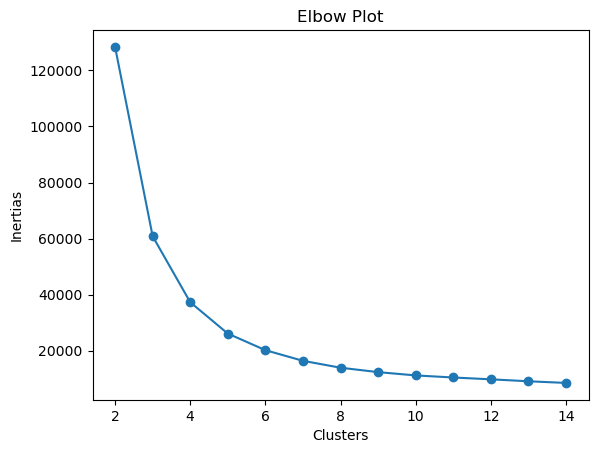

In [75]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, init='k-means++',random_state=0).fit(musicDataEncoded)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')
plt.title("Elbow Plot")
plt.xlabel("Clusters")
plt.ylabel("Inertias")

In [76]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0).fit(musicDataEncoded)
kmeans

KMeans(n_clusters=6, random_state=0)

In [77]:
identifiedCluster = kmeans.fit_predict(musicDataEncoded)
identifiedCluster = list(identifiedCluster)
identifiedCluster

[4,
 0,
 1,
 0,
 5,
 5,
 5,
 5,
 1,
 4,
 1,
 1,
 5,
 0,
 4,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 5,
 0,
 4,
 0,
 4,
 0,
 1,
 0,
 0,
 5,
 1,
 0,
 4,
 4,
 4,
 5,
 4,
 5,
 0,
 5,
 4,
 0,
 4,
 0,
 0,
 5,
 1,
 1,
 1,
 0,
 0,
 5,
 5,
 4,
 0,
 1,
 2,
 3,
 3,
 2,
 2,
 0,
 0,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 0,
 1,
 0,
 4,
 0,
 5,
 0,
 1,
 5,
 4,
 1,
 5,
 1,
 4,
 5,
 5,
 5,
 1,
 0,
 1,
 0,
 4,
 1,
 1,
 5,
 0,
 1,
 4,
 4,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 1,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 1,
 1,
 4,
 5,
 4,
 1,
 4,
 4,
 4,
 5,
 1,
 4,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 0,
 5,
 0,
 1,
 4,
 4,
 5,
 4,
 1,
 5]

In [78]:
import joblib
  
# Save the xgb_clf_tfidf model as a pickle in a file
joblib.dump(kmeans, r'C:\Users\ASUS\PycharmProjects\Chat_bot\utils\csv\kmeansClusteringmusic.pkl')

['C:\\Users\\ASUS\\PycharmProjects\\Chat_bot\\utils\\csv\\kmeansClusteringmusic.pkl']

In [79]:
musicDataEncoded["cluster_predicted"] = identifiedCluster
musicDataEncoded

,Language,MusicCategory,Source,cluster_predicted
0,4,1,41,4
1,4,0,106,0
2,4,8,24,1
3,4,7,118,0
4,4,6,83,5
...,...,...,...,...
175,2,5,53,4
176,2,4,84,5
177,2,3,51,4
178,2,11,15,1


In [80]:
musicData["cluster_predicted"] = identifiedCluster
musicData

,Language,MusicCategory,Source,cluster_predicted
0,Hindi,Classical Music(Old),https://www.youtube.com/watch?v=Dv0CoJlrmww,4
1,Hindi,Classical Music(New),https://www.youtube.com/watch?v=sR72qlhpwEo,0
2,Hindi,Romantic Music (Old ),https://www.youtube.com/watch?v=5HvPhqmzGQ8,1
3,Hindi,Romantic Music (New),https://www.youtube.com/watch?v=yIlAe2EQOLY,0
4,Hindi,Road Trip Music (Old),https://www.youtube.com/watch?v=da2havkA7x0,5
...,...,...,...,...
175,English,Road Trip Music (New),https://www.youtube.com/watch?v=MnmcEjEzlLk,4
176,English,Dance Music (Old),https://www.youtube.com/watch?v=fSqicTTg1Ps,5
177,English,Dance Music (New),https://www.youtube.com/watch?v=KNaCJYX-mgY,4
178,English,Sad Music (Old),https://www.youtube.com/watch?v=31uL5UnYrVg,1


In [81]:
musicData.describe()

,cluster_predicted
count,180.000000
mean,2.483333
std,1.712507
min,0.000000
25%,1.000000
50%,2.500000
75%,4.000000
max,5.000000


In [82]:
cluster_0 = musicData[musicData['cluster_predicted'] == 0]
cluster_1 = musicData[musicData['cluster_predicted'] == 1]
cluster_2 = musicData[musicData['cluster_predicted'] == 2]
cluster_3 = musicData[musicData['cluster_predicted'] == 3]
cluster_4 = musicData[musicData['cluster_predicted'] == 4]
cluster_5 = musicData[musicData['cluster_predicted'] == 5]

In [83]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 172
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Language           30 non-null     object
 1   MusicCategory      30 non-null     object
 2   Source             30 non-null     object
 3   cluster_predicted  30 non-null     int32 
dtypes: int32(1), object(3)
memory usage: 1.1+ KB


In [84]:
cluster_1.head(5)

,Language,MusicCategory,Source,cluster_predicted
2,Hindi,Romantic Music (Old ),https://www.youtube.com/watch?v=5HvPhqmzGQ8,1
8,Hindi,Sad Music (Old),https://www.youtube.com/watch?v=31Ep8mSP9GE,1
10,Gujarati,Classical Music(Old),http://www.youtube.com/watch?v=FRACuUcOIV4,1
11,Gujarati,Classical Music(New),https://www.youtube.com/watch?v=4hxkVDpT2yY,1
15,Gujarati,Road Trip Music (New),https://www.youtube.com/watch?v=8o0yLb3AXqM,1


In [85]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 60 to 167
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Language           28 non-null     object
 1   MusicCategory      28 non-null     object
 2   Source             28 non-null     object
 3   cluster_predicted  28 non-null     int32 
dtypes: int32(1), object(3)
memory usage: 1008.0+ bytes


In [86]:
cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 61 to 169
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Language           30 non-null     object
 1   MusicCategory      30 non-null     object
 2   Source             30 non-null     object
 3   cluster_predicted  30 non-null     int32 
dtypes: int32(1), object(3)
memory usage: 1.1+ KB


In [87]:
# # Load the model from the file
kmeans_model = joblib.load(r'C:\Users\ASUS\PycharmProjects\Chat_bot\utils\csv\kmeansClusteringmusic.pkl')
kmeans_model

KMeans(n_clusters=6, random_state=0)

In [88]:
musicData.to_csv(r"C:\Users\ASUS\PycharmProjects\Chat_bot\utils\csv\musicData.csv",header=True, index=False)
musicDataEncoded.to_csv(r"C:\Users\ASUS\PycharmProjects\Chat_bot\utils\csv\musicDataEnc.csv",header=True, index=False)